# (Ford GoBike System Data)
## by (Michael Maher)

## Preliminary Wrangling


In [96]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [97]:
# Loading the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [98]:
df.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


### Cleaning the Data

In [99]:
df.dropna().shape

(174952, 16)

In [100]:
df.shape

(183412, 16)

In [101]:
# Percentage of the data that have null values
print('We removed',((183412-174952)/183412)*100,'% of the data')

We removed 4.612566244302445 % of the data


#### since it's less than 5% its safe to just drop all null values from our dataset.

In [102]:
df = df.dropna()
df.shape

(174952, 16)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

#### There's too many features that I do not need, so I'll remove those

In [104]:
df.drop(columns=['start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude','bike_id','end_time','bike_share_for_all_trip'],inplace=True)
df.head()

,duration_sec,start_time,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,Customer,1984.0,Male
2,61854,2019-02-28 12:13:13.2180,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,Subscriber,1974.0,Male
5,1793,2019-02-28 23:49:58.6320,Subscriber,1959.0,Male


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   duration_sec       174952 non-null  int64  
 1   start_time         174952 non-null  object 
 2   user_type          174952 non-null  object 
 3   member_birth_year  174952 non-null  float64
 4   member_gender      174952 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.0+ MB


#### Now lets fix the wrong data types

In [106]:
df.start_time=pd.to_datetime(df.start_time)
df.member_birth_year=df.member_birth_year.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   duration_sec       174952 non-null  int64         
 1   start_time         174952 non-null  datetime64[ns]
 2   user_type          174952 non-null  object        
 3   member_birth_year  174952 non-null  int32         
 4   member_gender      174952 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 7.3+ MB


In [107]:
df.describe()

,duration_sec,member_birth_year
count,174952.000000,174952.000000
mean,704.002744,1984.803135
std,1642.204905,10.118731
min,61.000000,1878.000000
25%,323.000000,1980.000000
50%,510.000000,1987.000000
75%,789.000000,1992.000000
max,84548.000000,2001.000000


In [108]:
df.start_time.max() , df.start_time.min()

(Timestamp('2019-02-28 23:59:18.548000'),
 Timestamp('2019-02-01 00:00:20.636000'))

#### It seems like the this data was taken in 2019, I'll construct age column and remove those under 3 years old and above 100 years old

In [109]:
df['age']=2019-df.member_birth_year
df.head()

,duration_sec,start_time,user_type,member_birth_year,member_gender,age
0,52185,2019-02-28 17:32:10.145,Customer,1984,Male,35
2,61854,2019-02-28 12:13:13.218,Customer,1972,Male,47
3,36490,2019-02-28 17:54:26.010,Subscriber,1989,Other,30
4,1585,2019-02-28 23:54:18.549,Subscriber,1974,Male,45
5,1793,2019-02-28 23:49:58.632,Subscriber,1959,Male,60


In [110]:
df.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

#### there's no one under 3, the youngest is 18, but there's unrealisticly high ages way above 100 years old. to be removed.

In [111]:
df.drop(df.query('age>100').index,axis=0,inplace=True)
#df[df.age > 100].index
df.query('age>100').index
df.describe()

,duration_sec,member_birth_year,age
count,174880.000000,174880.000000,174880.000000
mean,704.022358,1984.837957,34.162043
std,1642.514884,9.974001,9.974001
min,61.000000,1920.000000,18.000000
25%,323.000000,1980.000000,27.000000
50%,510.000000,1987.000000,32.000000
75%,789.000000,1992.000000,39.000000
max,84548.000000,2001.000000,99.000000


In [112]:
# Percentage of total data we lost
print('We removed',((183412-df.shape[0])/183412)*100,'% of the data')

We removed 4.651822127232679 % of the data


The data lost is still less than 5% which is good.

We can now remove the member birth year since we got their age

In [113]:
df.drop(columns='member_birth_year',inplace=True)

#### Since the duration in seconds is not very helpful so I'll convert it to minutes

In [114]:
df['duration_min'] = round(df.duration_sec/60,2)
df.head()

,duration_sec,start_time,user_type,member_gender,age,duration_min
0,52185,2019-02-28 17:32:10.145,Customer,Male,35,869.75
2,61854,2019-02-28 12:13:13.218,Customer,Male,47,1030.90
3,36490,2019-02-28 17:54:26.010,Subscriber,Other,30,608.17
4,1585,2019-02-28 23:54:18.549,Subscriber,Male,45,26.42
5,1793,2019-02-28 23:49:58.632,Subscriber,Male,60,29.88


In [115]:
df.duration_min.describe()

count    174880.000000
mean         11.733700
std          27.375251
min           1.020000
25%           5.380000
50%           8.500000
75%          13.150000
max        1409.130000
Name: duration_min, dtype: float64

#### Now I'll divide the start_time into day of the week and time of day.

In [116]:
# DOW is Day Of Week, and TOD is Time Of Day
df['DOW'] = df['start_time'].dt.day_name()
df['TOD'] = pd.to_datetime(df['start_time']).dt.hour
df.head(2)

,duration_sec,start_time,user_type,member_gender,age,duration_min,DOW,TOD
0,52185,2019-02-28 17:32:10.145,Customer,Male,35,869.75,Thursday,17
2,61854,2019-02-28 12:13:13.218,Customer,Male,47,1030.90,Thursday,12


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174880 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   duration_sec   174880 non-null  int64         
 1   start_time     174880 non-null  datetime64[ns]
 2   user_type      174880 non-null  object        
 3   member_gender  174880 non-null  object        
 4   age            174880 non-null  int32         
 5   duration_min   174880 non-null  float64       
 6   DOW            174880 non-null  object        
 7   TOD            174880 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(3)
memory usage: 11.3+ MB


In [118]:
df.describe()

,duration_sec,age,duration_min,TOD
count,174880.000000,174880.000000,174880.000000,174880.000000
mean,704.022358,34.162043,11.733700,13.456181
std,1642.514884,9.974001,27.375251,4.734400
min,61.000000,18.000000,1.020000,0.000000
25%,323.000000,27.000000,5.380000,9.000000
50%,510.000000,32.000000,8.500000,14.000000
75%,789.000000,39.000000,13.150000,17.000000
max,84548.000000,99.000000,1409.130000,23.000000


In [119]:
# Dropping duration in seconds since we got it in minutes now and start time since we no longer need it
df.drop(columns=['duration_sec','start_time'],inplace=True)

In [120]:
df.head(1)

,user_type,member_gender,age,duration_min,DOW,TOD
0,Customer,Male,35,869.75,Thursday,17


## Univariate Exploration

First finding the age outliers and removing them

In [121]:
# custom function to avoid repetitive code
def labels(x,y,t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t);

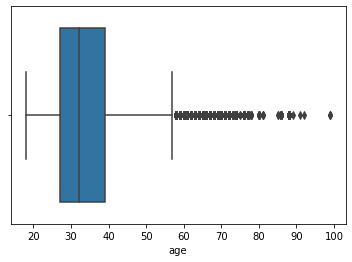

In [122]:
sb.boxplot(data=df,x='age');

We can consider anything above age of 58 as outlier, I'll remove those.

In [123]:
df = df.query('age < 58')
df.age.describe()

count    169171.000000
mean         33.185558
std           8.518091
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max          57.000000
Name: age, dtype: float64

### Does age effect the rents rides count?

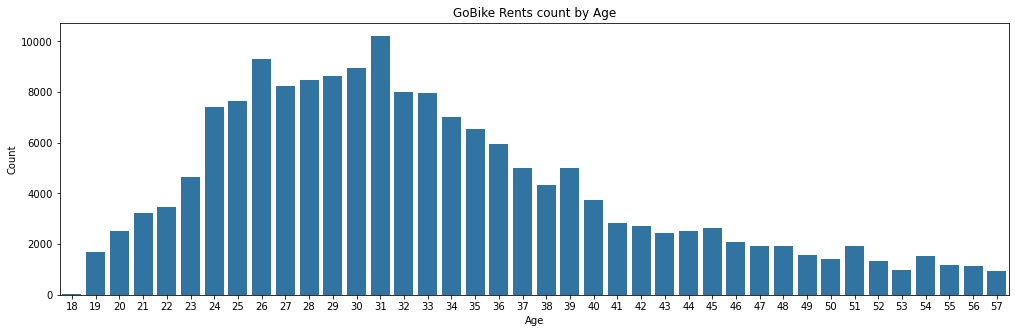

In [124]:
plt.figure(figsize=[17,5]);
sb.countplot(data=df,x='age',color=sb.color_palette()[0]);
labels("Age","Count","GoBike Rents count by Age")

### The graph is right skewed, which means the higher the age is the less likely they'd rent a bike.

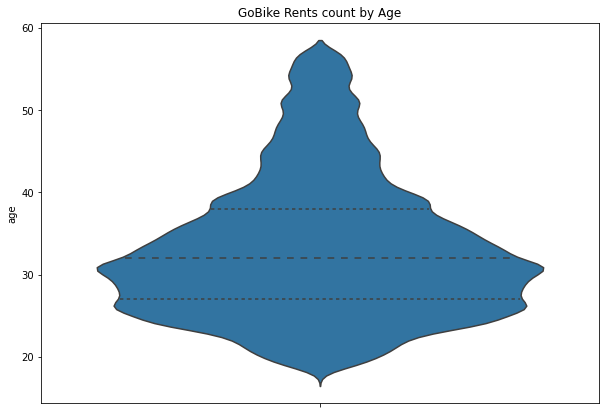

In [125]:
plt.figure(figsize=[10,7]);
sb.violinplot(data=df,y='age',inner='quartile',color=sb.color_palette()[0]);
plt.title('GoBike Rents count by Age');

In [126]:
df.age.mean()

33.185557808371414

### The average age is around 33 but as the age increases the number of rents decreases dramatically, which probably means those rents could be used for going to work more than being used as a sport or entertainment, we'll test that theory.

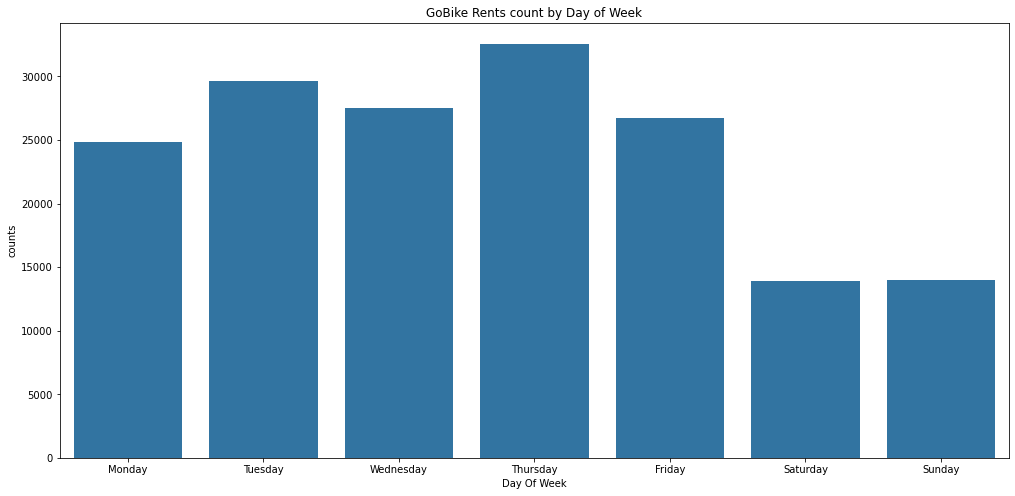

In [127]:
plt.figure(figsize=[17,8]);
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

sb.countplot(data=df,x='DOW',color=sb.color_palette()[0],order=days);
labels('Day Of Week','counts','GoBike Rents count by Day of Week')

### As I guessed, the rents are way less during the weekends, which means those are mostly used as transportation during work days

#### Now let's see the number of subscribers vs customers

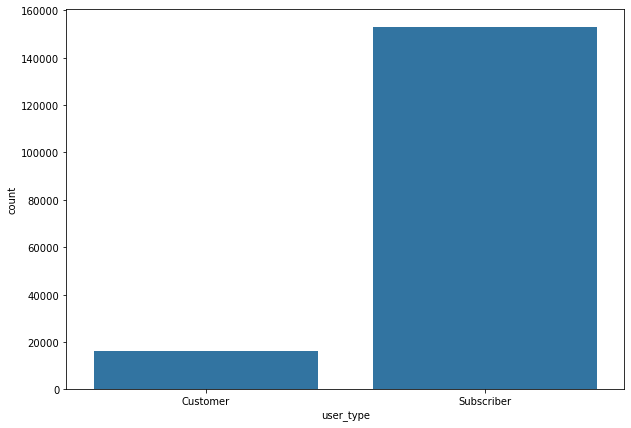

In [128]:
plt.figure(figsize=[10,7]);
sb.countplot(data=df,x='user_type',color=sb.color_palette()[0]);

I think using proportation for this would be more informative

In [129]:
# Getting the proportions to graph
n_type = df['user_type'].value_counts().sum()
max_type_count = df['user_type'].value_counts().max()
max_prop = max_type_count/n_type
tick_props = np.arange(0, max_prop, 0.10)
tick_names = ['{:0.1f}%'.format(v*100) for v in tick_props]

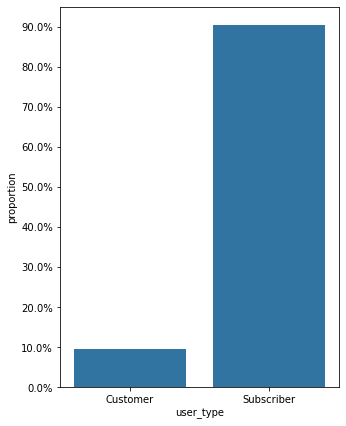

In [130]:
plt.figure(figsize=[5,7]);
sb.countplot(data=df,x='user_type',color=sb.color_palette()[0]);
plt.yticks(tick_props * n_type, tick_names)
plt.ylabel('proportion');

### Only about 10% are customers while around 90% are subscribers!!
#### Could they be using the service differently?

In [131]:
# Getting the proportions to graph
n_type = df['member_gender'].value_counts().sum()
max_type_count = df['member_gender'].value_counts().max()
max_prop = max_type_count/n_type
tick_props = np.arange(0, max_prop + 0.05, 0.05)
tick_names = ['{:0.1f}%'.format(v*100) for v in tick_props]

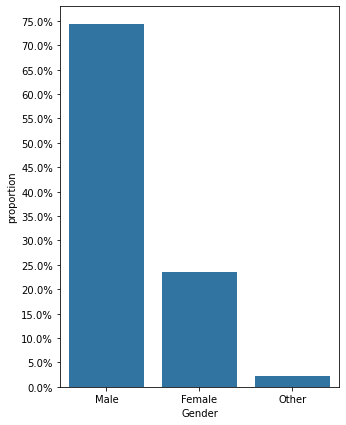

In [132]:
plt.figure(figsize=[5,7]);
sb.countplot(data=df,x='member_gender',color=sb.color_palette()[0],order=['Male','Female','Other']);
plt.yticks(tick_props * n_type, tick_names)
#plt.ylabel('proportion');
labels("Gender","proportion","")

### Over 70% are males!

## Bivariate Exploration


In [133]:
df.query('user_type == "Subscriber"')['DOW']

3         Thursday
4         Thursday
6         Thursday
7         Thursday
8         Thursday
            ...   
183407      Friday
183408      Friday
183409      Friday
183410      Friday
183411      Friday
Name: DOW, Length: 152949, dtype: object

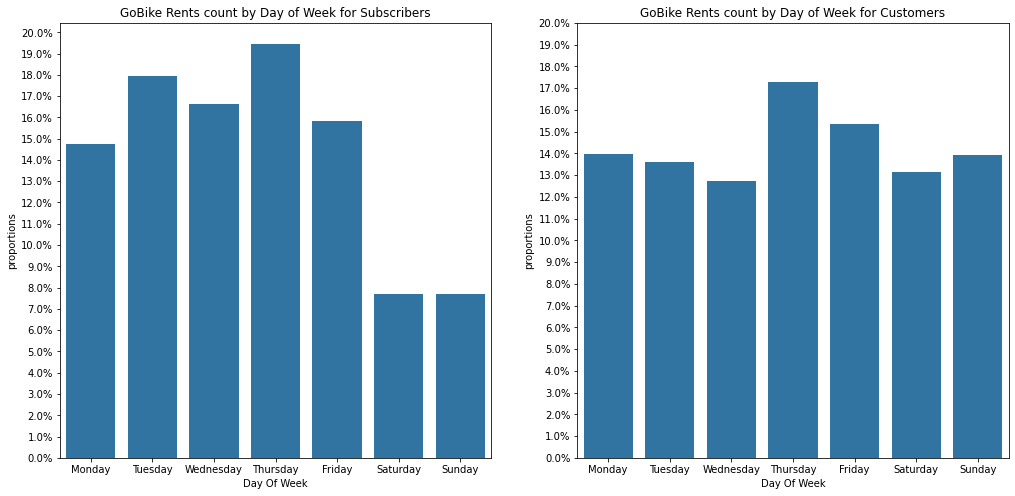

In [134]:
plt.figure(figsize=[17,8]);
# Getting the proportions to graph 1
n_type = df.query('user_type == "Subscriber"')['DOW'].value_counts().sum()
tick_props = np.arange(0, 0.21, 0.01)
tick_names = ['{:0.01f}%'.format(v*100) for v in tick_props]
# plot 1
plt.subplot(1,2,1)
sb.countplot(data=df.query('user_type == "Subscriber"'),x='DOW',color=sb.color_palette()[0],order=days);
plt.yticks(tick_props * n_type, tick_names);
labels('Day Of Week','proportions','GoBike Rents count by Day of Week for Subscribers')

# Getting the proportions to graph 2
n_type = df.query('user_type == "Customer"')['DOW'].value_counts().sum()
tick_props = np.arange(0, 0.21, 0.01)
tick_names = ['{:0.01f}%'.format(v*100) for v in tick_props]
# plot 2
plt.subplot(1,2,2)
sb.countplot(data=df.query('user_type == "Customer"'),x='DOW',color=sb.color_palette()[0],order=days);
plt.yticks(tick_props * n_type, tick_names);
labels('Day Of Week','proportions','GoBike Rents count by Day of Week for Customers')

### Customers are probably using the bikes for entertainment while Subscribers are probably using it for work since customers are clearly using the service on weekends way more than subscribers do.

#### Could Subscribers & Customers be using the service at different time in the day? 

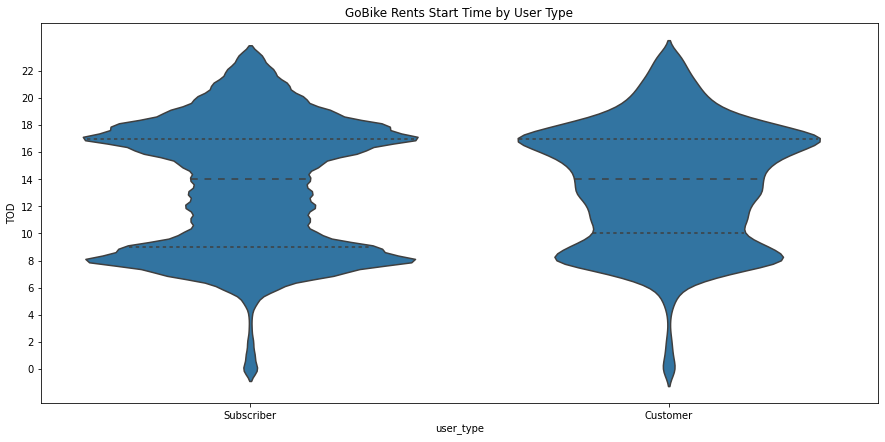

In [135]:
plt.figure(figsize=[15,7]);
sb.violinplot(data=df,x='user_type',y='TOD',inner='quartile',color=sb.color_palette()[0],order=['Subscriber','Customer']);
y=np.arange(0,24,2)
plt.yticks(y,y)
plt.title('GoBike Rents Start Time by User Type');

### The busiest time of the day is around 8:00 and 17:00 for both user types, but customers tend to rent bikes through the rest of the day at higher rate than subscribers (comparing each group to their own proportion), this shows that some customers rent bikes for work(8:00 to 17 indicate typical working shift hours) as well but there's a lot more customers renting bikes for entertainment than subscribers do.

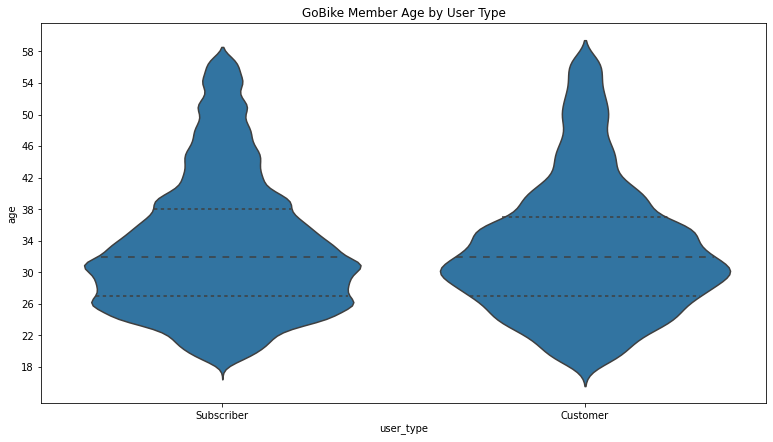

In [136]:
plt.figure(figsize=[13,7]);
sb.violinplot(data=df,x='user_type',y='age',inner='quartile',color=sb.color_palette()[0],order=['Subscriber','Customer']);
y=np.arange(18,60,4)
plt.yticks(y,y)
plt.title('GoBike Member Age by User Type');

### This shows that age distribution on both group types is similar, which means age doesn't have an effect on the user type being subscriber or a customer.

#### Do different user types rent for different duration?

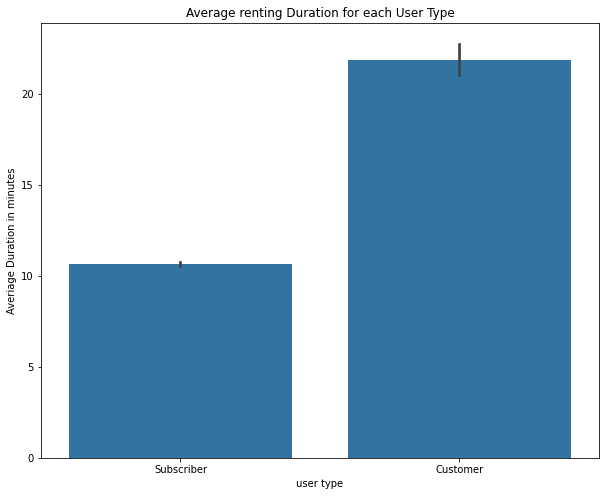

In [137]:
plt.figure(figsize=[10,8]);
sb.barplot(data=df,x='user_type',y='duration_min',color=sb.color_palette()[0],order=['Subscriber','Customer']);
labels('user type','Averiage Duration in minutes','Average renting Duration for each User Type')

### This shows that customers tend to rent the bike for longer time than subscribers do, Customers rent for almost more than double the duration of time Subscribers do, I was not expecting this but now when I think about it, it make sense. Because Subscribers tend to rent bikes just to go to work and back so they prioritize speed, while customers tend to rent for entertainment purposes so its logical that they'd rent a bike for a longer duration.

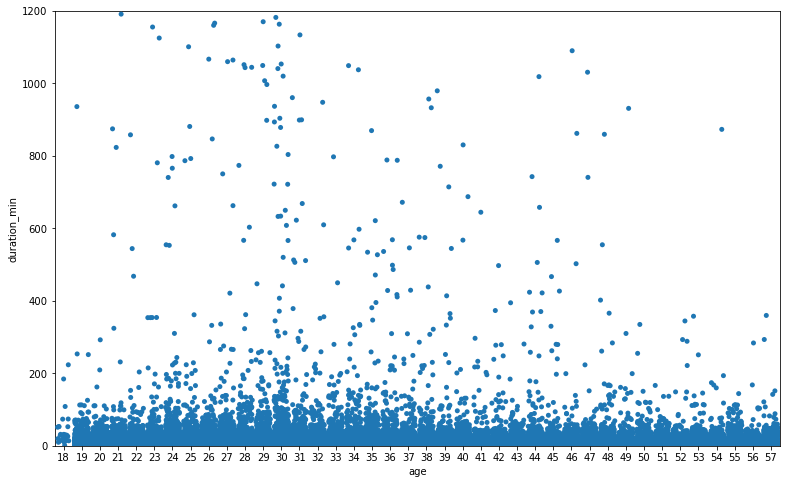

In [138]:
plt.figure(figsize=[13,8]);
sb.stripplot(data=df,x='age',y='duration_min',jitter=0.4,color=sb.color_palette()[0]);
plt.ylim([0,1200]);

### Its safe to assume that age have an effect on the renting duration, as people get older they rent for less time, but that only strongly apply for rents longer than 3 hours, otherwise age doesn't seem to have any major effect on rents duration.

In [139]:
# Average duration in minutes of Subscribers vs Customers
df.query('user_type =="Subscriber"').duration_min.mean() , df.query('user_type =="Customer"').duration_min.mean(), df.duration_min.mean()

(10.644672276379591, 21.845244112933006, 11.71870787546325)

### The average renting duration is between 10 and 20 minutes, which is way less than 3 hours so the graph above is not very useful since it only applies to a small portion of our data

## Multivariate Exploration


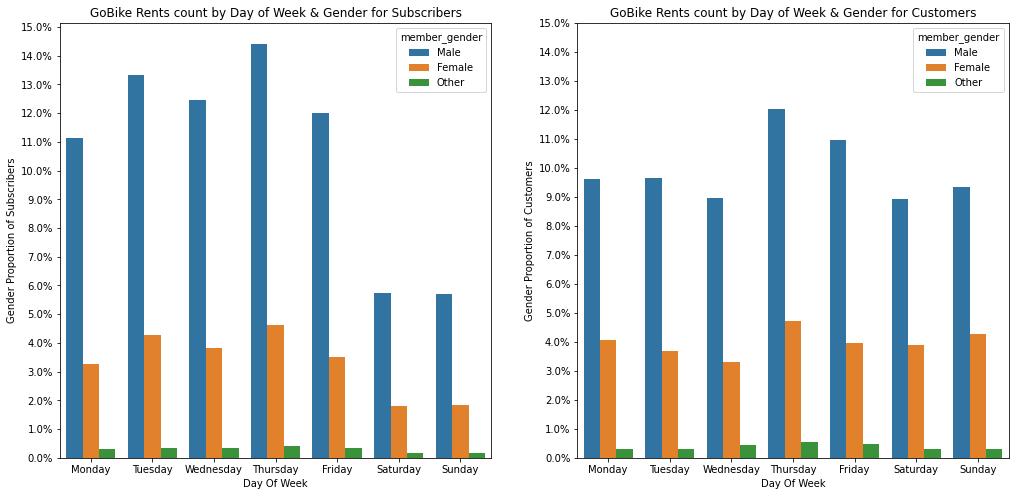

In [140]:
plt.figure(figsize=[17,8]);
# Getting the proportions to graph 1
n_type = df.query('user_type == "Subscriber"')['DOW'].value_counts().sum()
max_type_count = df.query('user_type == "Subscriber" and member_gender== "Male"')['DOW'].value_counts().max()
max_prop = max_type_count/n_type
tick_props = np.arange(0, 0.16, 0.01)
tick_names = ['{:0.01f}%'.format(v*100) for v in tick_props]
# plot 1
plt.subplot(1,2,1)
sb.countplot(data=df.query('user_type == "Subscriber"'),x='DOW',order=days,hue='member_gender',hue_order=['Male','Female','Other']);
plt.yticks(tick_props * n_type, tick_names);
labels('Day Of Week','Gender Proportion of Subscribers','GoBike Rents count by Day of Week & Gender for Subscribers')

# Getting the proportions to graph 2
n_type = df.query('user_type == "Customer"')['DOW'].value_counts().sum()
max_type_count = df.query('user_type == "Customer" and member_gender== "Male"')['DOW'].value_counts().max()
max_prop = max_type_count/n_type
tick_props = np.arange(0, 0.16, 0.01)
tick_names = ['{:0.01f}%'.format(v*100) for v in tick_props]

plt.subplot(1,2,2)
sb.countplot(data=df.query('user_type == "Customer"'),x='DOW',order=days,hue='member_gender');
plt.yticks(tick_props * n_type, tick_names);
labels('Day Of Week','Gender Proportion of Customers','GoBike Rents count by Day of Week & Gender for Customers')

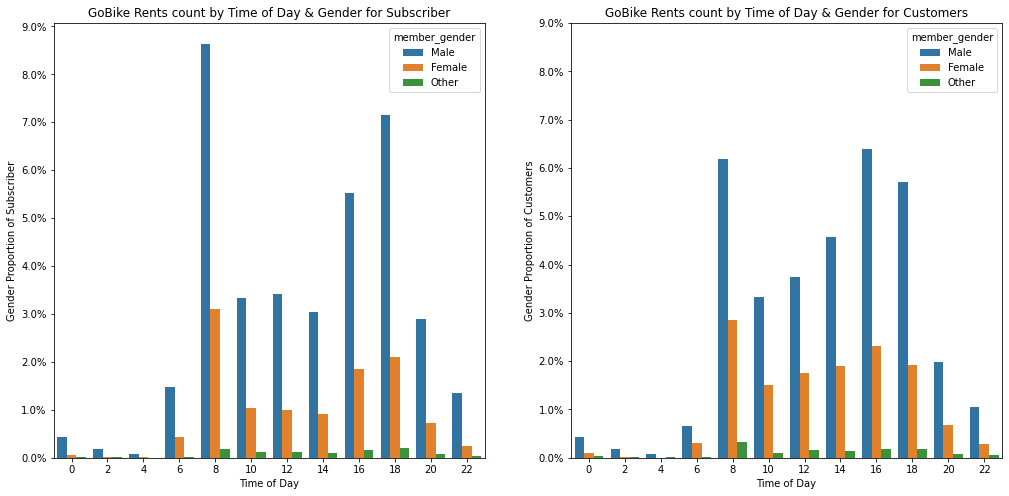

In [141]:
# Getting the proportions to graph 1
n_type = df.query('user_type == "Subscriber"')['TOD'].value_counts().sum()
max_type_count = df.query('user_type == "Subscriber" and member_gender== "Male"')['TOD'].value_counts().max()
max_prop = max_type_count/n_type
tick_props = np.arange(0, 0.1, 0.01)
tick_names = ['{:0.01f}%'.format(v*100) for v in tick_props]

plt.figure(figsize=[17,8]);
hours=np.arange(0,24,2)
plt.subplot(1,2,1)
sb.countplot(data=df.query('user_type == "Subscriber"'),x='TOD',order=hours,hue='member_gender',hue_order=['Male','Female','Other']);
labels('Time of Day','Gender Proportion of Subscriber','GoBike Rents count by Time of Day & Gender for Subscriber')
plt.yticks(tick_props * n_type, tick_names);

# Getting the proportions to graph 2
n_type = df.query('user_type == "Customer"')['TOD'].value_counts().sum()
max_type_count = df.query('user_type == "Customer" and member_gender== "Male"')['TOD'].value_counts().max()
max_prop = max_type_count/n_type
tick_props = np.arange(0, 0.1, 0.01)
tick_names = ['{:0.01f}%'.format(v*100) for v in tick_props]

plt.subplot(1,2,2)
sb.countplot(data=df.query('user_type == "Customer"'),x='TOD',order=hours,hue='member_gender');
labels('Time of Day','Gender Proportion of Customers','GoBike Rents count by Time of Day & Gender for Customers')
plt.yticks(tick_props * n_type, tick_names);

### Gender doesn't seem to have any effect on the rents start time nor the day of week for either subscribers nor customers

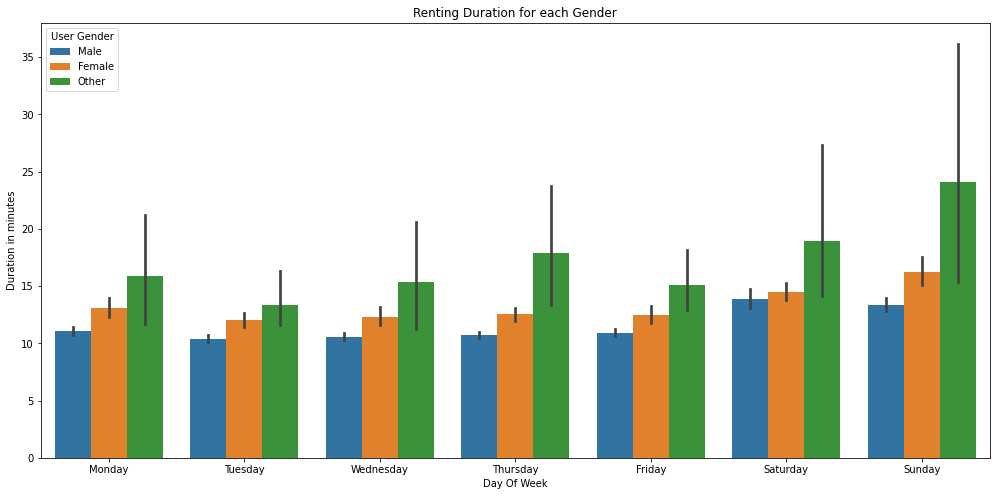

In [142]:
plt.figure(figsize=[17,8]);
# plot
sb.barplot(data=df,x='DOW',hue='member_gender',y='duration_min',order=days,hue_order=['Male','Female','Other']);
labels('Day Of Week','Duration in minutes','Renting Duration for each Gender')
plt.legend(title="User Gender");

### While other graphs showed us that females and other genders are less than 25% of our data proportion this graph shows that females and other genders tend to rent for longer duration than males.

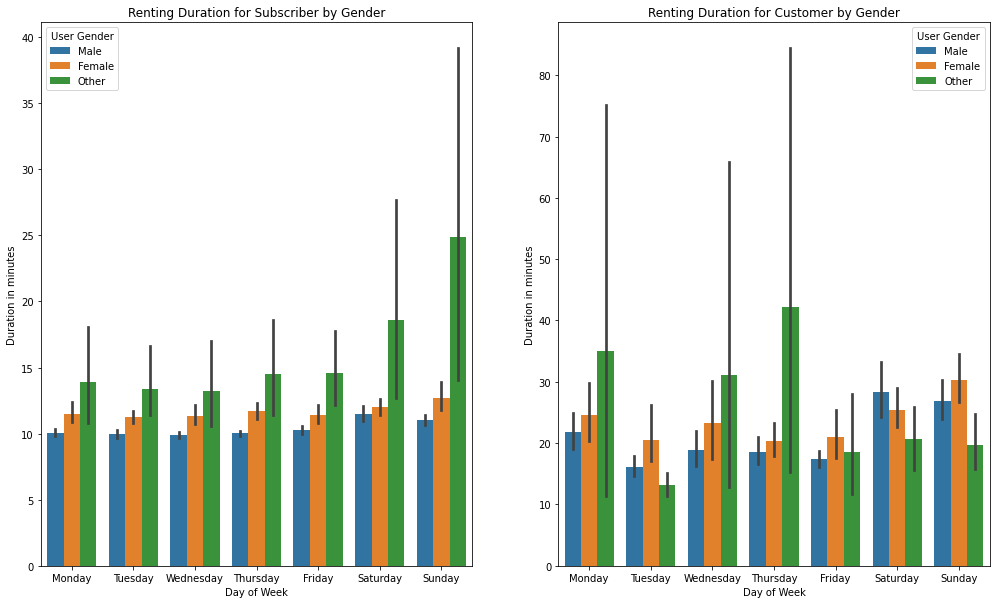

In [143]:
plt.figure(figsize=[17,10]);
# plot
plt.subplot(1,2,1)
sb.barplot(data=df.query('user_type == "Subscriber"'),x='DOW',hue='member_gender',y='duration_min',order=days,hue_order=['Male','Female','Other']);
labels('Day of Week','Duration in minutes','Renting Duration for Subscriber by Gender')
plt.legend(title="User Gender");
plt.subplot(1,2,2)
sb.barplot(data=df.query('user_type == "Customer"'),x='DOW',hue='member_gender',y='duration_min',order=days,hue_order=['Male','Female','Other']);
labels('Day of Week','Duration in minutes','Renting Duration for Customer by Gender')
plt.legend(title="User Gender");

### Not sure what to make of that, it seems like for customers sometimes males rent for longer duration specially on weekends.

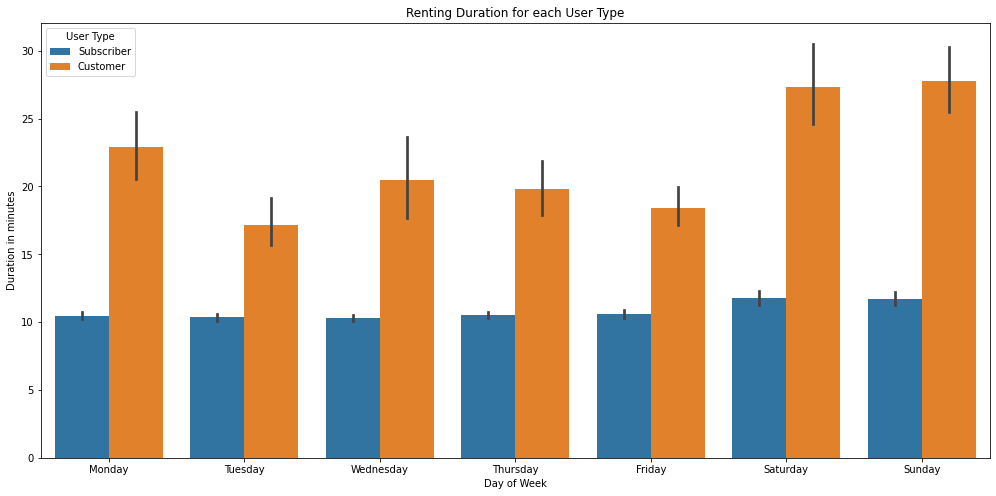

In [144]:
plt.figure(figsize=[17,8]);
# plot
sb.barplot(data=df,x='DOW',hue='user_type',y='duration_min',order=days,hue_order=['Subscriber','Customer']);
labels('Day of Week','Duration in minutes','Renting Duration for each User Type')
plt.legend(title="User Type");

### This makes it clear that Customers rent for longer duration than Subscribers, While other graphs shows that most Subscribers don't rent during weekends, this one shows that those who do rent during weekends (including customers) tend to rent it for a longer duration.